In [0]:
pip install xgboost

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install catboost

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install lightgbm

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from random import sample

# Data processing
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit


In [0]:
# Models
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
import catboost
from catboost import CatBoostClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,average_precision_score,classification_report,roc_auc_score

In [0]:
#plot
plt.rcParams['figure.dpi']=150
%config InlineBackend.figure_format = 'png2x'
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x')

<command-3509414384281600>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png2x')


#load data

In [0]:
readme=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/readme.csv')
readme

,Variable,Description
0,candidate_id,Unique ID for each applicant
1,application_status,"Application Status. ""Hired"" indicates a succes..."
2,number_of_employees_log,Log of the number of employees at given company
3,occupation_id,Unique ID for each role.
4,company_id,Unique ID for each company
5,occupation_skill_1_count,Count of skills associated with attribute for ...
6,occupation_skill_2_count,Count of skills associated with attribute for ...
7,occupation_skill_3_count,Count of skills associated with attribute for ...
8,occupation_skill_4_count,Count of skills associated with attribute for ...
9,occupation_skill_5_count,Count of skills associated with attribute for ...


In [0]:
data=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/data.csv')
print(data.shape)
data.head()

(50000, 60)


,candidate_id,application_status,number_of_employees_log,occupation_id,company_id,occupation_skill_1_count,occupation_skill_2_count,occupation_skill_3_count,occupation_skill_4_count,occupation_skill_5_count,...,candidate_skill_2_count,candidate_skill_3_count,candidate_skill_4_count,candidate_skill_5_count,candidate_skill_6_count,candidate_skill_7_count,candidate_skill_8_count,candidate_skill_9_count,candidate_relative_test_1,candidate_relative_test_2
0,bgjikcrozdgkrtzigymnaylpypxxublc0,interview,2.0,exvwhbxlejsfyqxnwjabksnntpwodfhr0,xuemjhkyskdkwxlfbykrvkrffvpoepid0,1.0,0.0,0.0,1.0,0.0,...,7.0,2.0,8.0,12.0,0.0,9.0,4.0,6.0,0.600274,0.348715
1,pgvjmzqyjgzmbgqetvzteeejufcexbur1,interview,1.0,jpegpbxvbsjbkwmahpbvcdbxzcdjmack1,ndahnrikmemhkgwgsrfoaazzkszfntja1,0.0,0.0,0.0,1.0,1.0,...,NaN,0.0,4.0,10.0,5.0,1.0,3.0,0.0,0.759273,0.972119
2,snzyhcbqkbtiydfxcxhpcyzuirxzpxcx2,interview,1.0,czwkhxbmdopwdiuufvsxtahuqnifojgl2,xzlecjjnxynakiohuqudeusnnrzlrivp2,0.0,1.0,NaN,0.0,1.0,...,4.0,7.0,4.0,NaN,2.0,NaN,6.0,1.0,0.664639,0.597499
3,tbugkzlvhnkjkgzclndonrcusetoygmc3,hired,4.0,aeuvpjqtkaeeqghymzriuvoyqfzikhwq3,hxxnjooagjshdqeioibhovqqggztvbaw3,NaN,NaN,NaN,NaN,0.0,...,5.0,7.0,0.0,3.0,1.0,8.0,0.0,NaN,0.622446,0.569189
4,fxhprrcbbbqkuidxmjcahezgljgnxbte4,hired,4.0,iyejtuewotamjissxrmlncpoteqyqvdk4,tqjeojjlpmnmnnoxyrewiacjzipaawpm4,0.0,NaN,NaN,0.0,NaN,...,6.0,NaN,8.0,NaN,1.0,1.0,10.0,4.0,0.493108,0.708251


# data cleaning

In [0]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [0]:
clean_df=data.copy()
labels = clean_df['application_status']
labels[labels != 'hired'] = 0
labels[labels == 'hired'] = 1
labels = labels.astype(int)

features_to_drop = ['application_status', 'candidate_id', 'occupation_id', 'company_id', 'application_attribute_1']
clean_df = clean_df.drop(features_to_drop, axis=1)

feature_names = np.array(clean_df.keys().to_list())

<command-3509414384281561>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[labels != 'hired'] = 0
<command-3509414384281561>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[labels == 'hired'] = 1


In [0]:
encode_df = clean_df.copy()
features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
for feature in features_to_encode:
    encode_df = encode_and_bind(encode_df, feature)

data = encode_df.values
data = np.nan_to_num(data.astype(float))

# data exploration

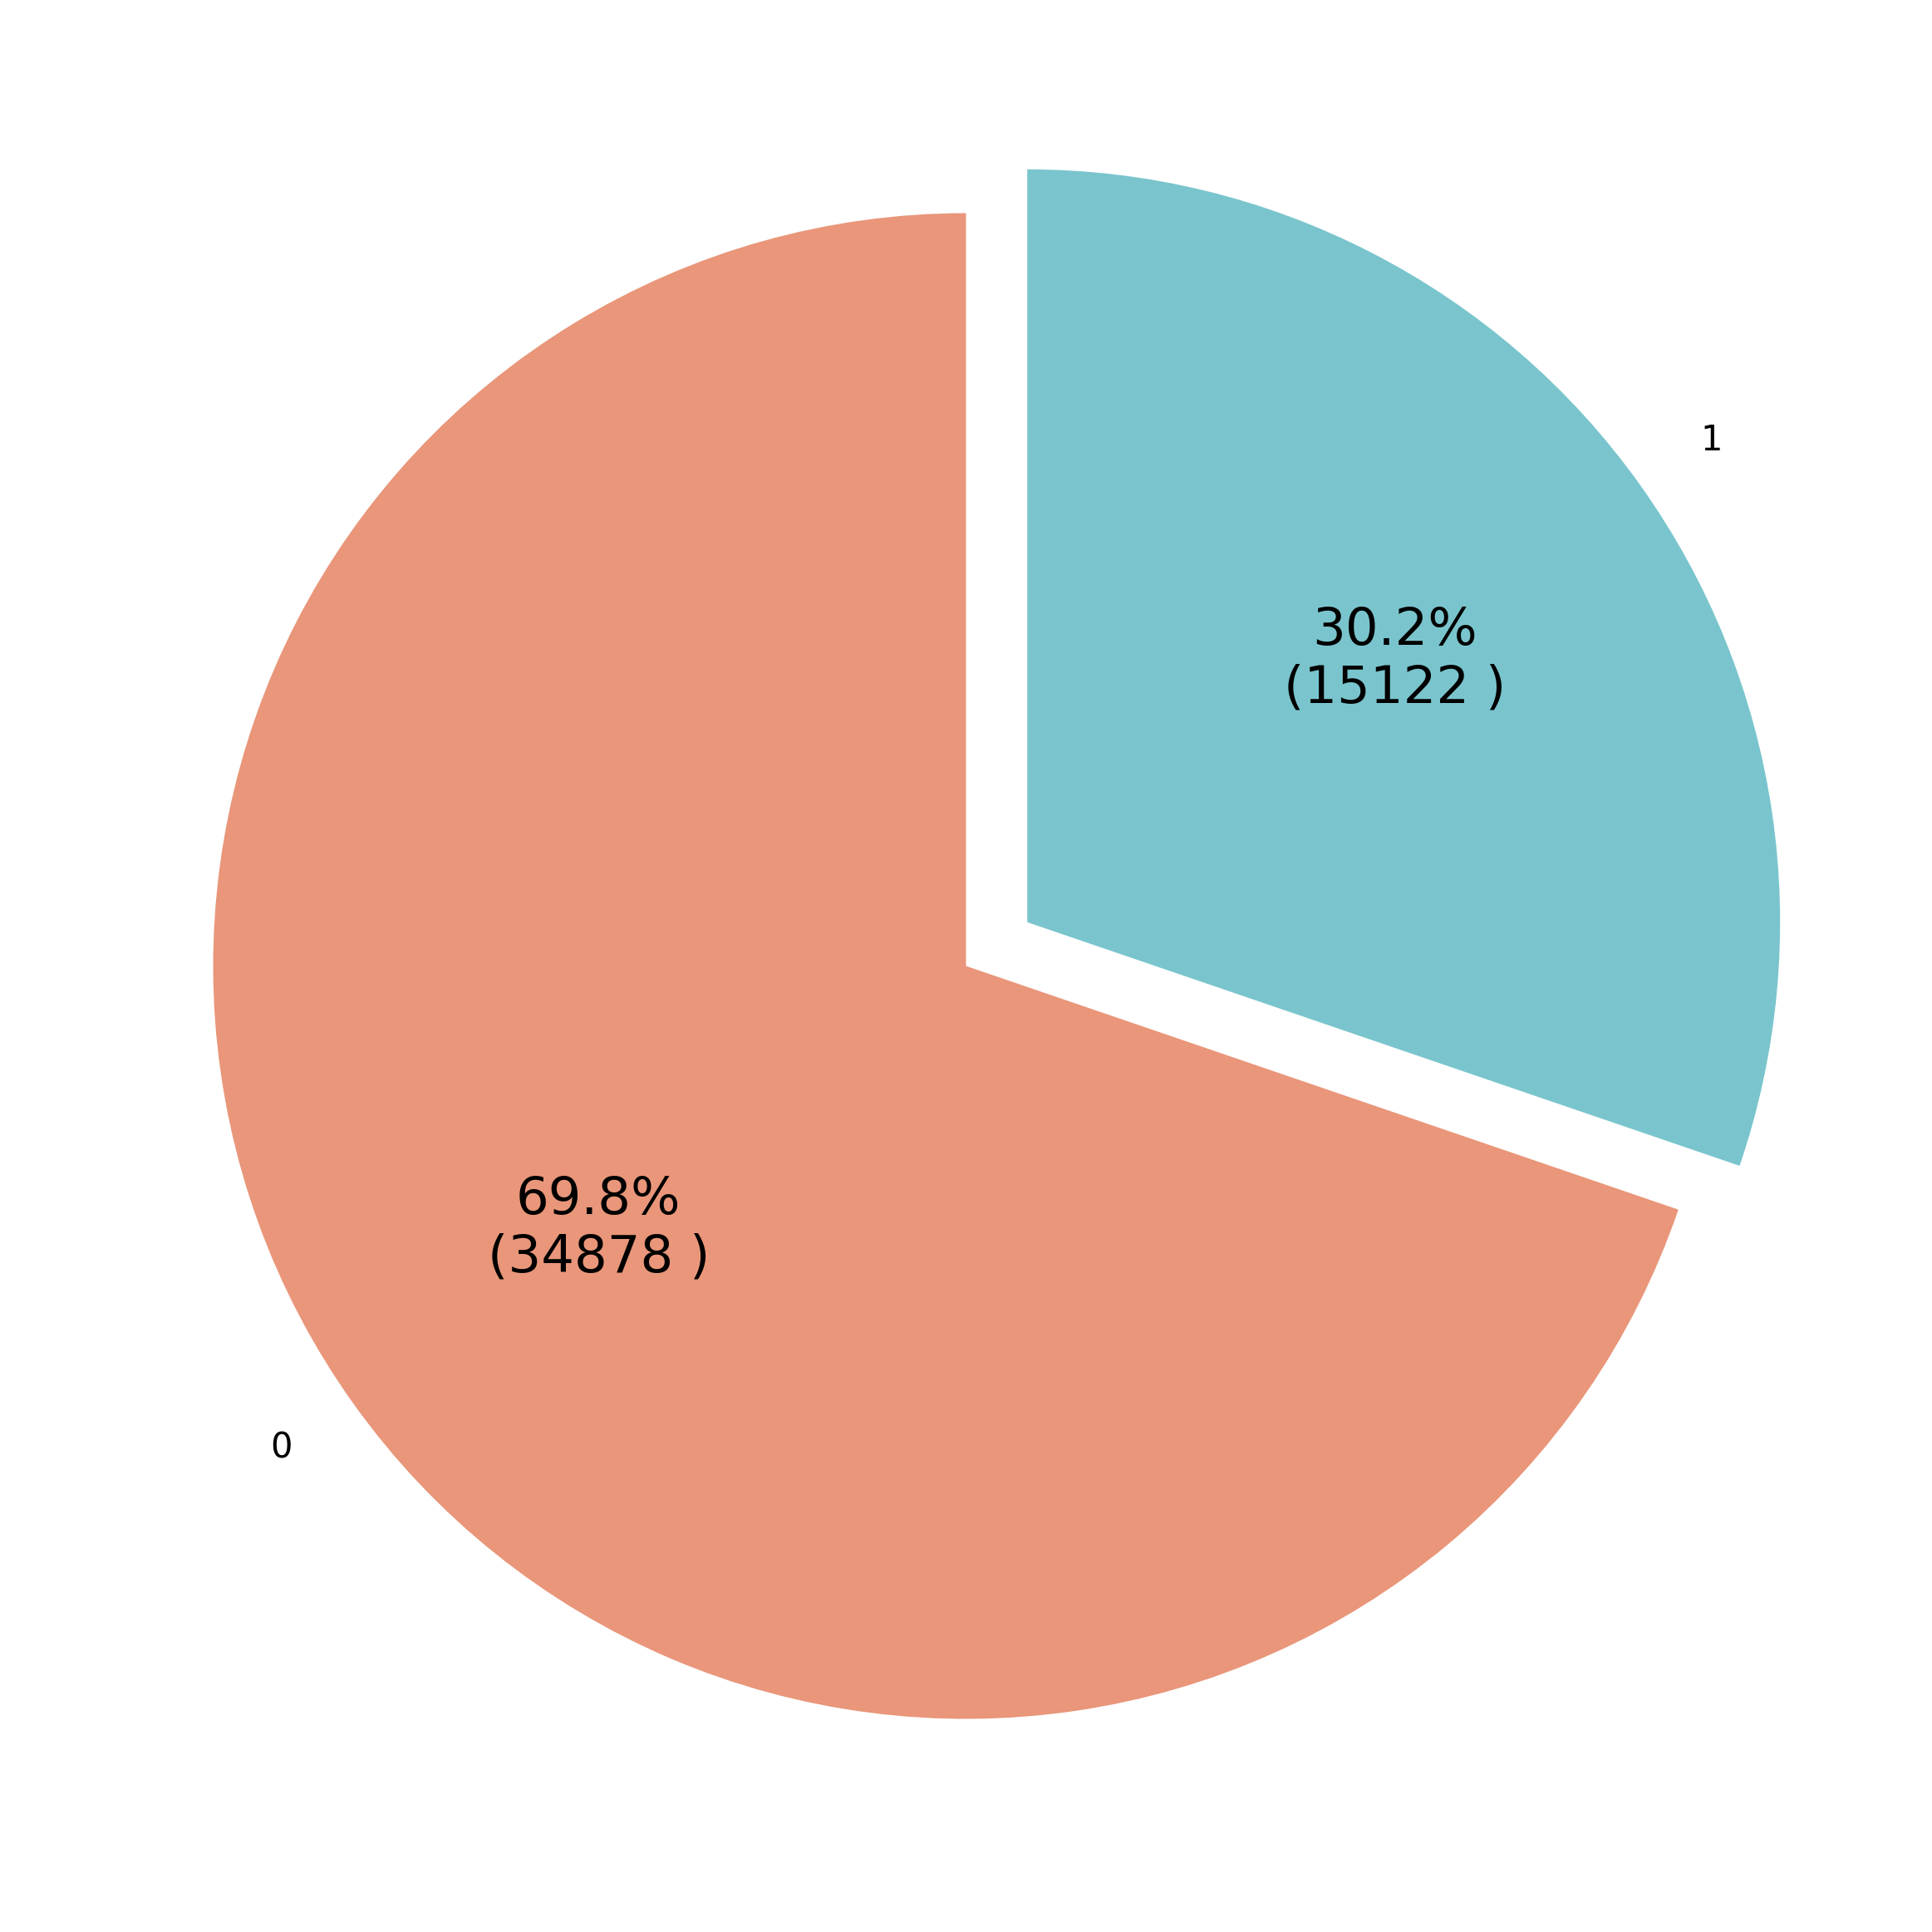

In [0]:
import matplotlib.pyplot as plt
feature=labels

l = feature.unique()
sizes = feature.value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice

def func(pct, allvalues):
    absolute = round(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 10))
colors = ( "#E9967A", "#7AC5CD") 
wedges, texts, autotexts = ax.pie(sizes,
                                  autopct = lambda pct: func(pct, sizes),
                                  explode = explode,
                                  labels = l,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 90,
#                                   wedgeprops = wp,
                                  textprops = dict(color ="black"))

plt.setp(autotexts, size = 15)
plt.show()

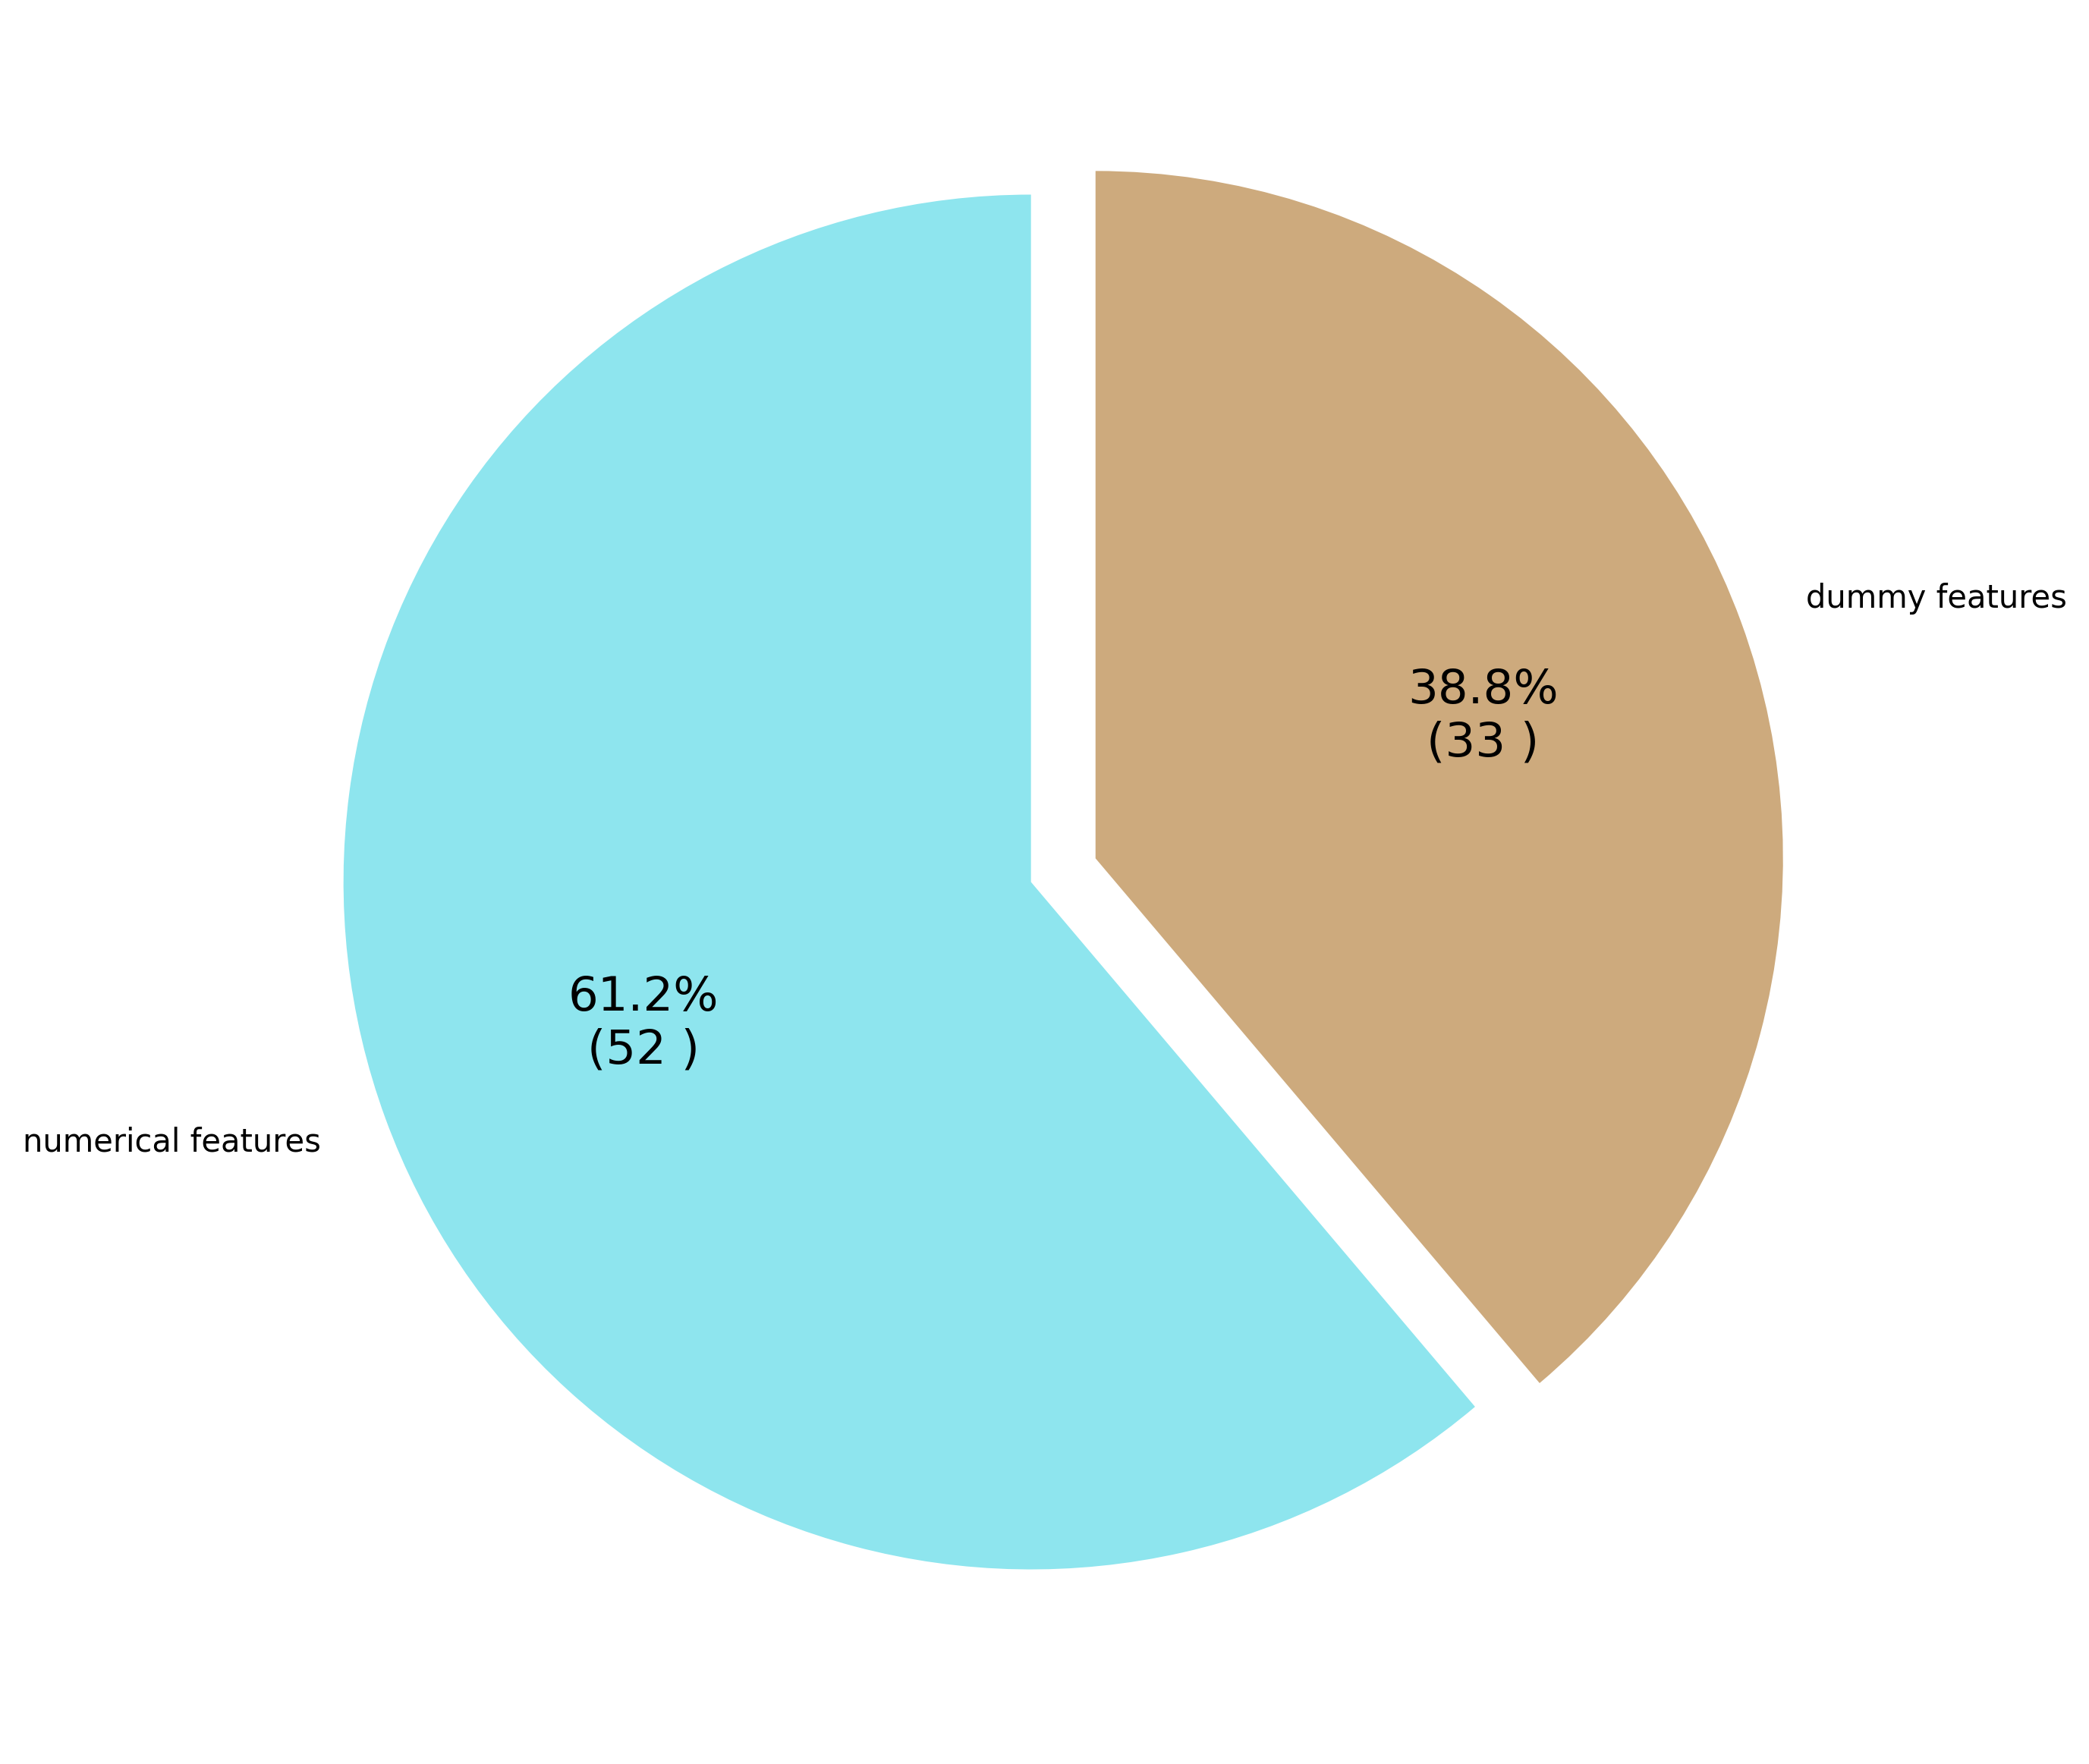

In [0]:
import matplotlib.pyplot as plt
feature=labels

l = ['numerical features','dummy features']
sizes = [len(feature_names)-3,data.shape[1]-(len(feature_names)-3)]
explode = (0, 0.1)  # only "explode" the 2nd slice

def func(pct, allvalues):
    absolute = round(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 10))
colors = ( "#8EE5EE", "#CDAA7D") 
wedges, texts, autotexts = ax.pie(sizes,
                                  autopct = lambda pct: func(pct, sizes),
                                  explode = explode,
                                  labels = l,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 90,
#                                   wedgeprops = wp,
                                  textprops = dict(color ="black"))

plt.setp(autotexts, size = 15)
plt.show()

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
scaler = StandardScaler()
df_subset=scaler.fit_transform(data)
tsne_results = tsne.fit_transform(df_subset)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.002s...
[t-SNE] Computed neighbors for 50000 samples in 50.185s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for s

Out[113]: <AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

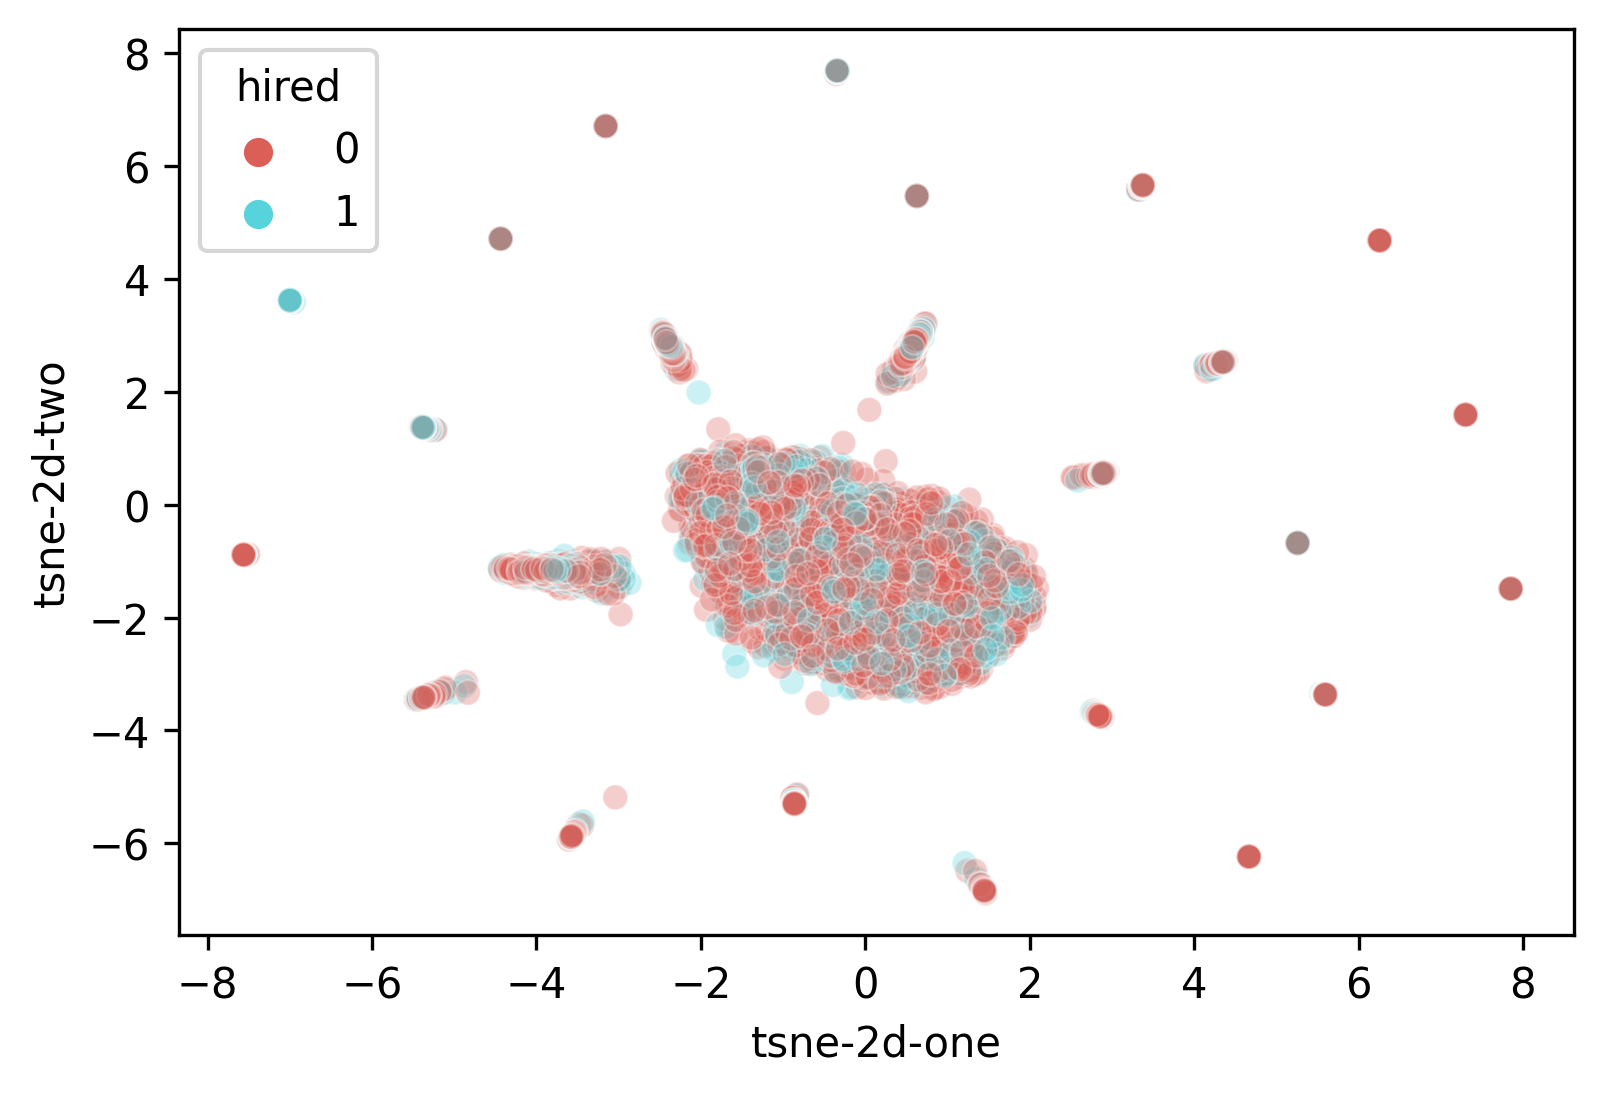

In [0]:
df_subset=pd.DataFrame(df_subset)
tsne_results=pd.DataFrame(tsne_results)
df_subset['tsne-2d-one'] = tsne_results.iloc[:,0]
df_subset['tsne-2d-two'] = tsne_results.iloc[:,1]
df_subset['hired'] = labels
# plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='hired',
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.14983541 0.13569667]


Out[115]: <AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

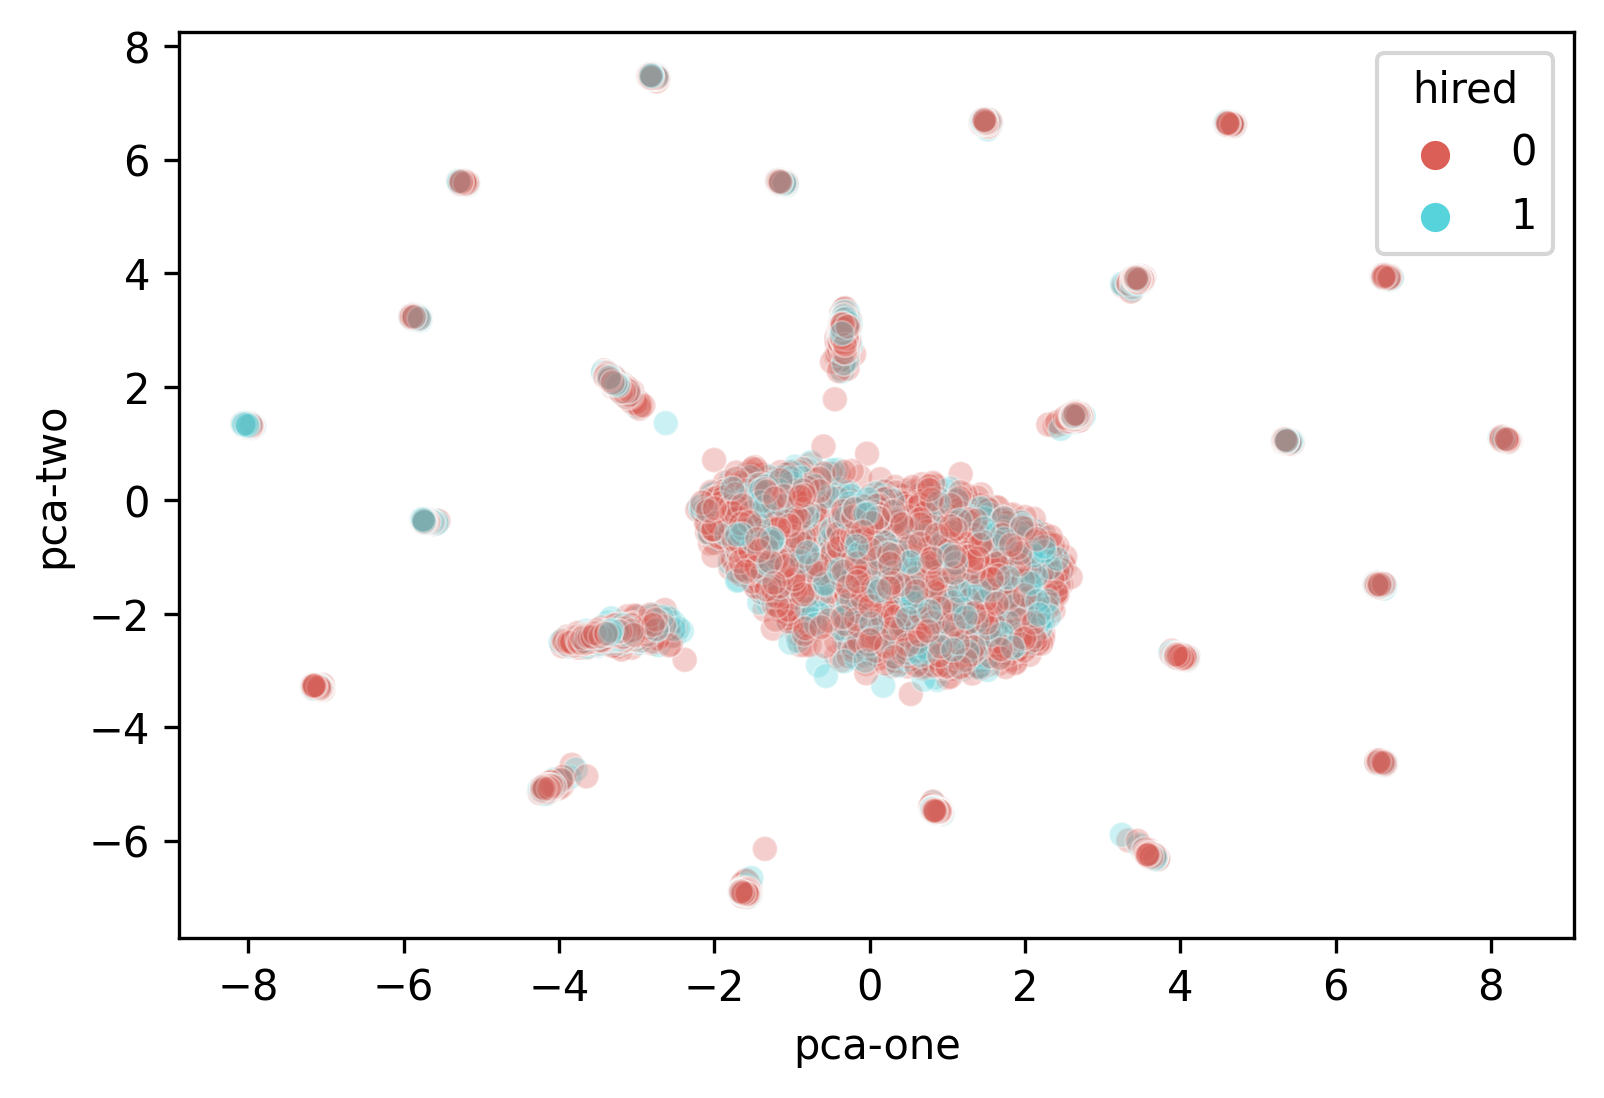

In [0]:
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="hired",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

# split data

In [0]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, Y_train = data[train_index], labels[train_index]
    X_test, Y_test = data[test_index], labels[test_index]

# model: unit test

In [0]:
# model = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000).fit(X_train, Y_train) #Accuracy = 0.69%. F1-score = 0.0000. AUC_ROC = 0.4943
# model = HistGradientBoostingClassifier().fit(X_train, Y_train) #Accuracy = 0.87%. F1-score = 0.7647. AUC_ROC = 0.8191
model = XGBClassifier().fit(X_train, Y_train) #Accuracy = 0.86%. F1-score = 0.7518. AUC_ROC = 0.8142
# model = LGBMClassifier().fit(X_train, Y_train) # Accuracy = 0.87%. F1-score = 0.7626. AUC_ROC = 0.8199
# model = GradientBoostingClassifier().fit(X_train, Y_train) #Accuracy = 0.82%. F1-score = 0.6563. AUC_ROC = 0.7476
# model = CatBoostClassifier(silent=True).fit(X_train, Y_train) #Accuracy = 0.88%. F1-score = 0.7857. AUC_ROC = 0.8360


y_pred = model.predict(X_test)

In [0]:
y_proba = model.predict_proba(X_test)

In [0]:
f1 = f1_score(Y_test,y_pred, pos_label = 1)
acc = accuracy_score(Y_test,y_pred)
auc_roc = roc_auc_score(Y_test,y_pred)
print(f'Accuracy = {acc%100:.2f}%. F1-score = {f1:.4f}. AUC_ROC = {auc_roc:.4f}')

Accuracy = 0.88%. F1-score = 0.7857. AUC_ROC = 0.8360


In [0]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[162  12]
 [ 23  53]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       174
           1       0.82      0.70      0.75        76

    accuracy                           0.86       250
   macro avg       0.85      0.81      0.83       250
weighted avg       0.86      0.86      0.86       250



#Introduce arbitrariness by withdrawing 10% data

Because the population size is large enough, we can achieve some extent of arbitrariness by random sampling 90% people from the population.

## predict

In [0]:
def predict(clean_df):
    
    encode_df = clean_df.copy()
    features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
    for feature in features_to_encode:
        encode_df = encode_and_bind(encode_df, feature)

    data = encode_df.values
    data = np.nan_to_num(data.astype(float))

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=0)
    for train_index, test_index in sss.split(data, labels):
        X_train, Y_train = data[train_index], labels[train_index]
        X_test, Y_test = data[test_index], labels[test_index]
    Y_train=pd.DataFrame(Y_train)
    X_train=pd.DataFrame(X_train)
    Y_train.index=X_train.index

    
    # sample 90% of training data 
    n_employee=int(X_train.shape[0]*0.9)
    employee_list=list(X_train.index)
    sampled_emp=random.sample(employee_list,n_employee)
    X_train, Y_train = X_train.loc[sampled_emp,:], Y_train.loc[sampled_emp,:]

    model = XGBClassifier().fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(Y_test,y_pred, pos_label = 1)
    acc = accuracy_score(Y_test,y_pred)
    auc_roc = roc_auc_score(Y_test,y_pred)

    print(f'Accuracy = {acc%100:.2f}%. F1-score = {f1:.4f}. AUC_ROC = {auc_roc:.4f}')
#     return(f1,acc,auc_roc,y_pred)

In [0]:
predict(clean_df)

Accuracy = 0.86%. F1-score = 0.7407. AUC_ROC = 0.8031


## Prediction outcome for 55 runs

In [0]:
predict_outcome=pd.DataFrame(columns=np.arange(55),index=np.array(range(len(Y_test))))
evaluation_outcome=pd.DataFrame(columns=np.arange(55),index=['Accuracy','F1','AUC_ROC'])

In [0]:
for i in range(55):
    f1,acc,auc_roc,y_pred=predict(clean_df)
    predict_outcome.loc[:,i]=y_pred
    evaluation_outcome.loc['Accuracy',i]=acc
    evaluation_outcome.loc['F1',i]=f1
    evaluation_outcome.loc['AUC_ROC',i]=auc_roc

In [0]:
predict_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/employee_predict_outcome.csv',index_label=False)
evaluation_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/employee_evaluation_outcome.csv',index_label=False)


##Evaluation metric

In [0]:
employee_predict_outcome=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/employee_predict_outcome.csv')
employee_evaluation_outcome=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/employee_evaluation_outcome.csv')

In [0]:
# systematic error across all models
e_all_wrong=list()
e_all_false_pos=list()
e_all_false_neg=list()
e_all_right=list()
for i_result, result in enumerate(Y_test):
    if (result-np.mean(employee_predict_outcome.loc[i_result,:]))==-1:
        e_all_false_pos.append(i_result)
    if (result-np.mean(employee_predict_outcome.loc[i_result,:]))==1:
        e_all_false_neg.append(i_result)
    if abs(result-np.mean(employee_predict_outcome.loc[i_result,:]))==1:
        e_all_wrong.append(i_result)
    elif abs(result-np.mean(employee_predict_outcome.loc[i_result,:]))==0:
        e_all_right.append(i_result)
        
# number of prediction who were consistently wrong for all models
print((len(e_all_wrong)/len(Y_test)))

# number of prediction who were consistently right for all models
print((len(e_all_right)/len(Y_test)))

0.036
0.684


In [0]:
employee_evaluation_outcome['mean']=employee_evaluation_outcome.mean(axis=1)
employee_evaluation_outcome['std']=employee_evaluation_outcome.std(axis=1)
employee_evaluation_outcome
# evaluation_outcome

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,mean,std
Accuracy,0.832000,0.860000,0.844000,0.852000,0.856000,0.872000,0.848000,0.872000,0.880000,0.868000,...,0.880000,0.864000,0.856000,0.868000,0.860000,0.868000,0.864000,0.856000,0.863636,0.011474
F1,0.704225,0.744526,0.719424,0.733813,0.735294,0.774648,0.732394,0.771429,0.791667,0.772414,...,0.779412,0.750000,0.742857,0.762590,0.758621,0.759124,0.757143,0.750000,0.754953,0.021196
AUC_ROC,0.782970,0.806791,0.791591,0.801044,0.800212,0.830233,0.801875,0.826528,0.843391,0.831065,...,0.828569,0.809664,0.807623,0.819949,0.821612,0.816243,0.817075,0.815033,0.815130,0.014623


Out[173]: Text(0, 0.5, 'Frequency')

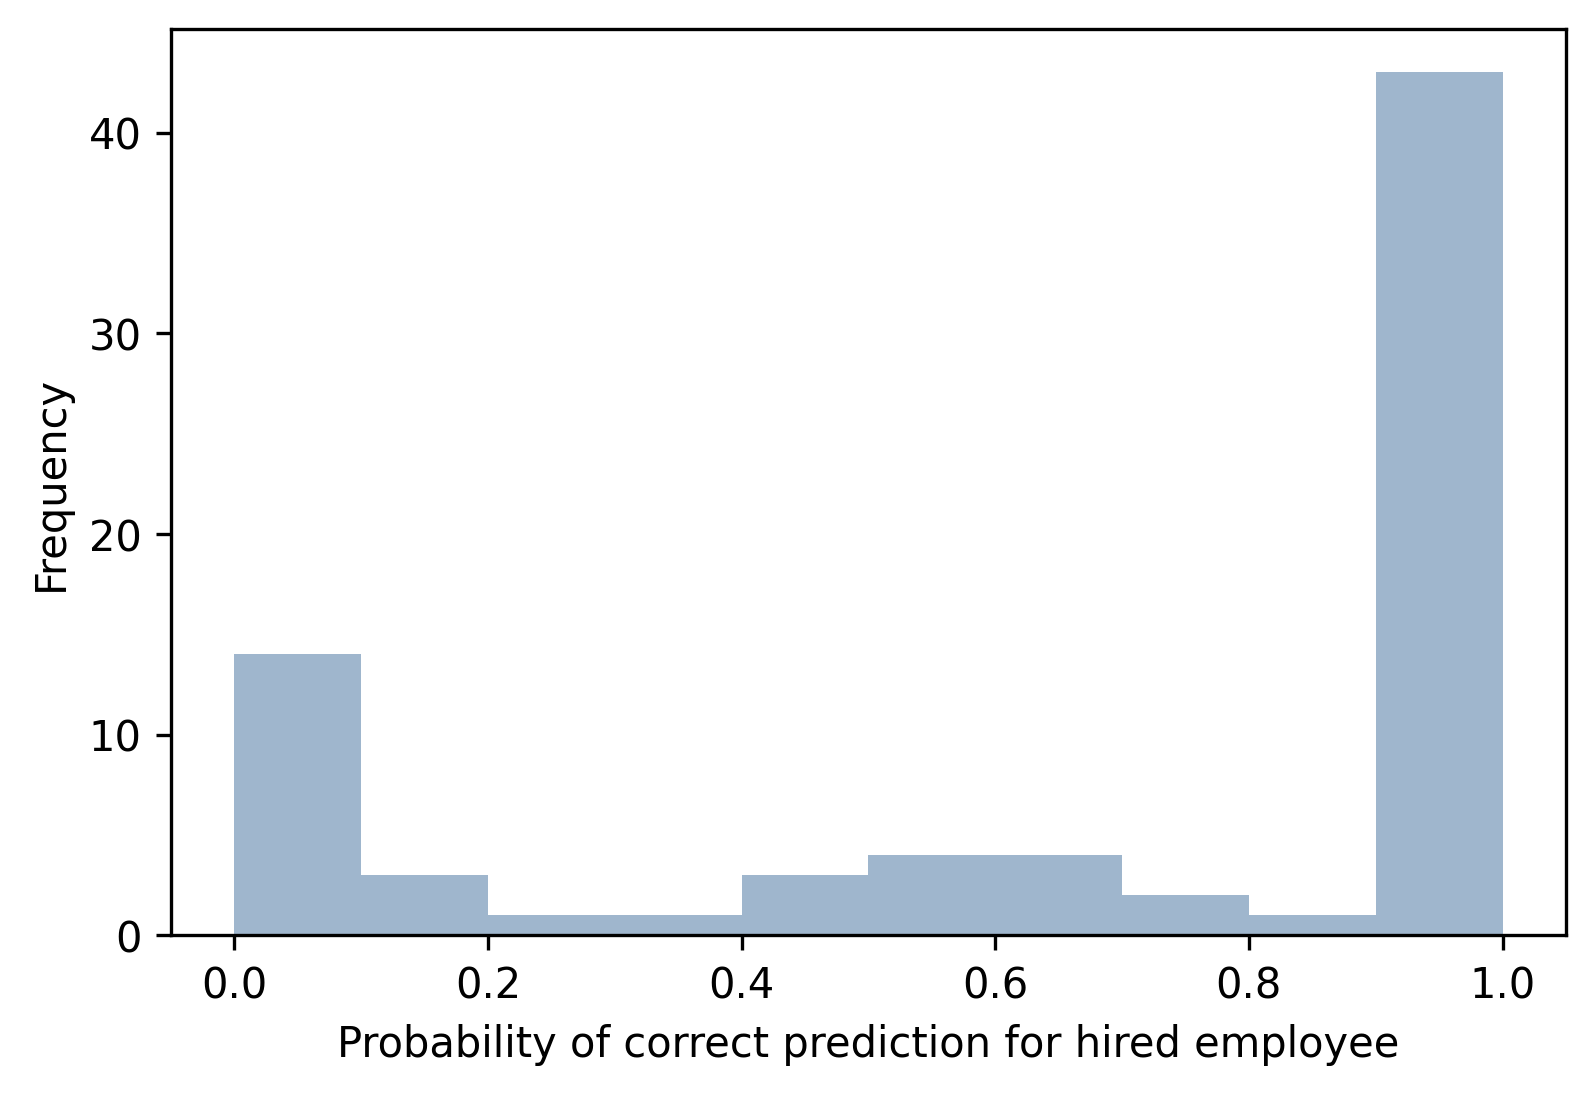

In [0]:
Y_test.index=predict_outcome.index
hired_accuracy=pd.DataFrame(columns=Y_test[Y_test==1].index,index=['mean_prediction'])
for i in Y_test[Y_test==1].index.to_list():
    hired_accuracy.loc['mean_prediction',i]=np.mean(predict_outcome.loc[i,:])
plt.hist(hired_accuracy.loc['mean_prediction',:].values,color='#9FB6CD')
plt.xlabel('Probability of correct prediction for hired employee')
plt.ylabel('Frequency')

3.6% percent of hired population were wrongly predicted by all models. 69.4% of hired population were correctly predicted all the time.

#Introduce arbitrariness by withdrawing features

## predict

In [0]:
def predict(clean_df,feature_names):
    
  
    # prints a random value from the list
    fnumber = list(np.arange(len(feature_names)))
    feature_to_mask = feature_names[random.choice(fnumber)]
    
    encode_df = clean_df.copy()
    encode_df = encode_df.drop(feature_to_mask, axis=1)

    features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
    for feature in features_to_encode:
        if feature == feature_to_mask:
            continue
        encode_df = encode_and_bind(encode_df, feature)
    
    data = encode_df.values
    data = np.nan_to_num(data.astype(float))

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=0)
    for train_index, test_index in sss.split(data, labels):
        X_train, Y_train = data[train_index], labels[train_index]
        X_test, Y_test = data[test_index], labels[test_index]


    model = XGBClassifier().fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(Y_test,y_pred, pos_label = 1)
    acc = accuracy_score(Y_test,y_pred)
    auc_roc = roc_auc_score(Y_test,y_pred)
    
    predict_outcome.loc[:,feature_to_mask]=y_pred
    evaluation_outcome.loc['Accuracy',feature_to_mask]=acc
    evaluation_outcome.loc['F1',feature_to_mask]=f1
    evaluation_outcome.loc['AUC_ROC',feature_to_mask]=auc_roc

    print(f'Masking feature {feature_to_mask}. Accuracy = {acc%100:.2f}%. F1-score = {f1:.4f}. AUC_ROC = {auc_roc:.4f}')

In [0]:
predict(clean_df,feature_names)

Masking feature candidate_skill_7_count. Accuracy = 0.86%. F1-score = 0.7500. AUC_ROC = 0.8150


## Prediction outcome for eliminating each feature

In [0]:
predict_outcome=pd.DataFrame(columns=feature_names,index=np.array(range(len(Y_test))))
evaluation_outcome=pd.DataFrame(columns=feature_names,index=['Accuracy','F1','AUC_ROC'])

In [0]:
for i_feature, feature_to_mask in enumerate(feature_names):
    encode_df = clean_df.copy()
    encode_df = encode_df.drop(feature_to_mask, axis=1)

    features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
    for feature in features_to_encode:
        if feature == feature_to_mask:
            continue
        encode_df = encode_and_bind(encode_df, feature)

    data = encode_df.values
    data = np.nan_to_num(data.astype(float))
    for train_index, test_index in sss.split(data, labels):
        X_train, Y_train = data[train_index], labels[train_index]
        X_test, Y_test = data[test_index], labels[test_index]


    model = XGBClassifier().fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(Y_test,y_pred, pos_label = 1)
    acc = accuracy_score(Y_test,y_pred)
    auc_roc = roc_auc_score(Y_test,y_pred)
    
    predict_outcome.loc[:,feature_to_mask]=y_pred
    evaluation_outcome.loc['Accuracy',feature_to_mask]=acc
    evaluation_outcome.loc['F1',feature_to_mask]=f1
    evaluation_outcome.loc['AUC_ROC',feature_to_mask]=auc_roc

#     print(f'Masking feature {i_feature}. Accuracy = {acc%100:.2f}%. F1-score = {f1:.4f}')

In [0]:
predict_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/feature_predict_outcome.csv',index_label=False)
evaluation_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/feature_evaluation_outcome.csv',index_label=False)


##Evaluation metric

In [0]:

feature_predict_outcome=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/feature_predict_outcome.csv')
feature_evaluation_outcome=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/feature_evaluation_outcome.csv')

In [0]:
# systematic error across all models
f_all_wrong=list()
f_all_false_pos=list()
f_all_false_neg=list()
f_all_right=list()
for i_result, result in enumerate(Y_test):
    if (result-np.mean(feature_predict_outcome.loc[i_result,:]))==-1:
        f_all_false_pos.append(i_result)
    if (result-np.mean(feature_predict_outcome.loc[i_result,:]))==1:
        f_all_false_neg.append(i_result)
    if abs(result-np.mean(feature_predict_outcome.loc[i_result,:]))==1:
        f_all_wrong.append(i_result)
    elif abs(result-np.mean(feature_predict_outcome.loc[i_result,:]))==0:
        f_all_right.append(i_result)
        
# number of prediction who were consistently wrong for all models
print((len(f_all_wrong)/len(Y_test)))

# number of prediction who were consistently right for all models
print((len(f_all_right)/len(Y_test)))

0.048
0.508


In [0]:
feature_evaluation_outcome['mean']=feature_evaluation_outcome.mean(axis=1)
feature_evaluation_outcome['std']=feature_evaluation_outcome.std(axis=1)
# feature_evaluation_outcome['min']=feature_evaluation_outcome.min(axis=1)
feature_evaluation_outcome

,number_of_employees_log,occupation_skill_1_count,occupation_skill_2_count,occupation_skill_3_count,occupation_skill_4_count,occupation_skill_5_count,occupation_skill_6_count,occupation_skill_7_count,occupation_skill_8_count,occupation_skill_9_count,...,candidate_skill_4_count,candidate_skill_5_count,candidate_skill_6_count,candidate_skill_7_count,candidate_skill_8_count,candidate_skill_9_count,candidate_relative_test_1,candidate_relative_test_2,mean,std
Accuracy,0.848000,0.860000,0.868000,0.864000,0.868000,0.840000,0.872000,0.856000,0.884000,0.848000,...,0.844000,0.856000,0.872000,0.856000,0.848000,0.852000,0.884000,0.868000,0.857309,0.031946
F1,0.724638,0.744526,0.762590,0.760563,0.765957,0.714286,0.774648,0.739130,0.797203,0.739726,...,0.723404,0.739130,0.777778,0.750000,0.728571,0.741259,0.794326,0.759124,0.740376,0.086000
AUC_ROC,0.794465,0.806791,0.819949,0.820780,0.823654,0.788717,0.830233,0.803917,0.846264,0.809286,...,0.795296,0.803917,0.833938,0.815033,0.798170,0.808454,0.842559,0.816243,0.808024,0.048676


Out[184]: Text(0, 0.5, 'Frequency')

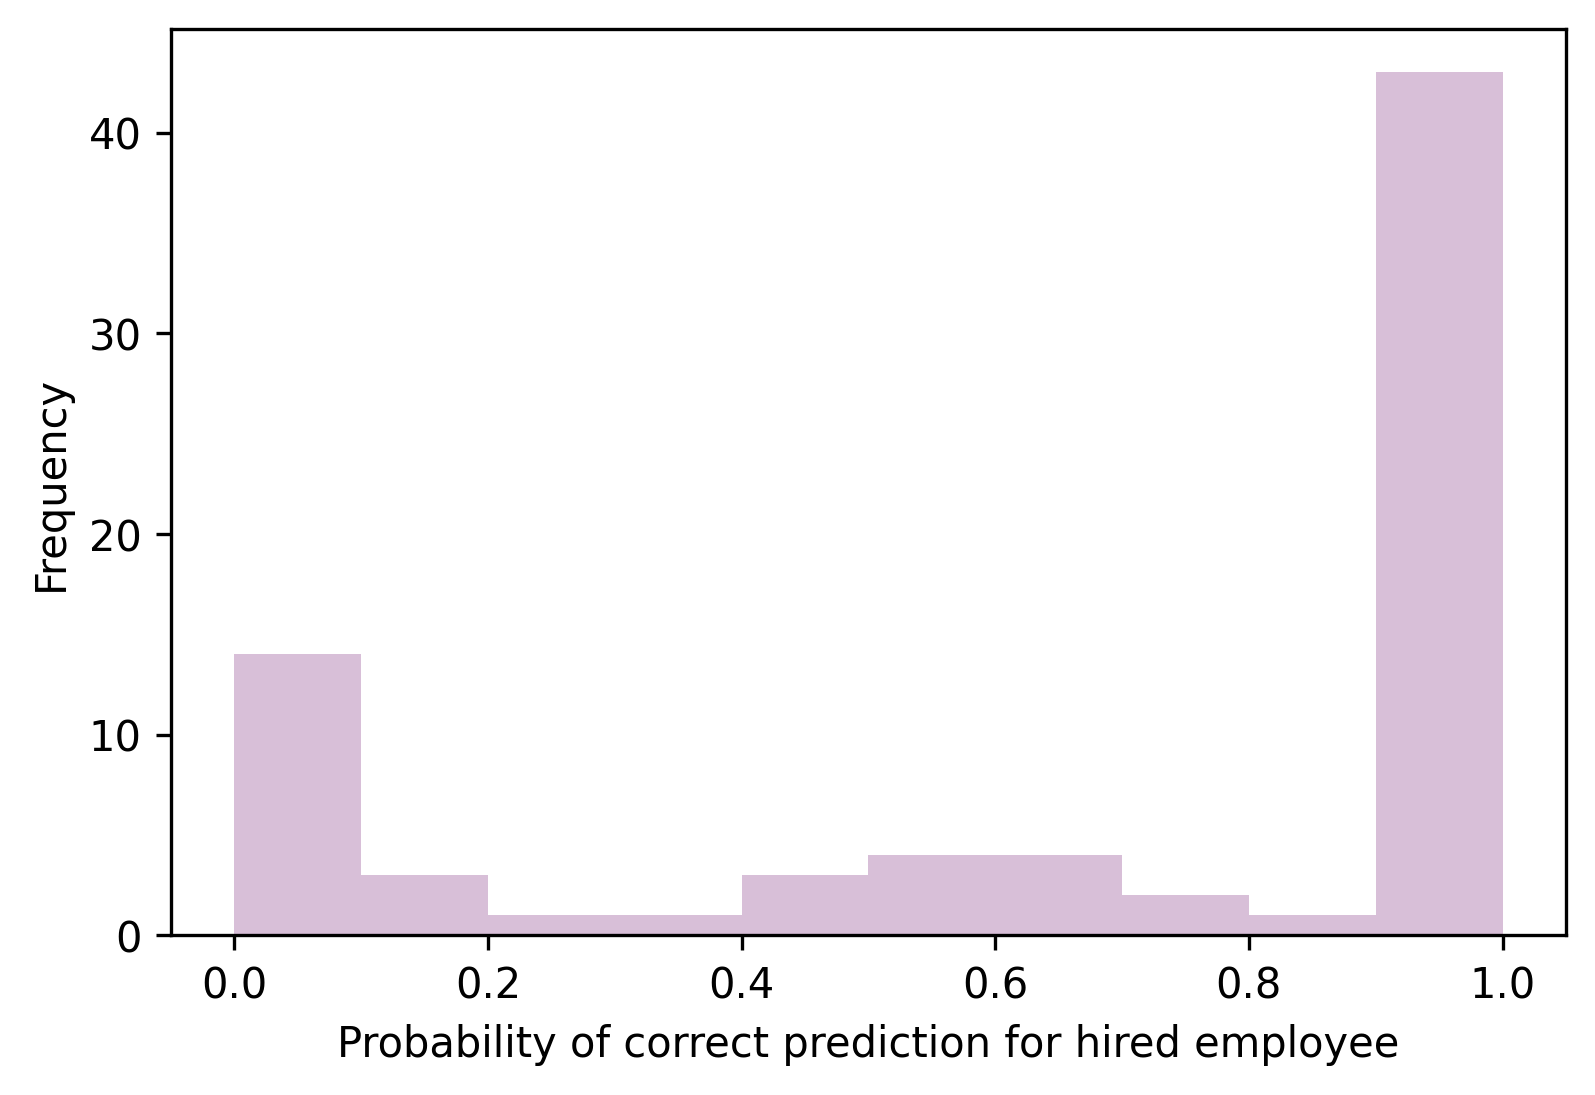

In [0]:
Y_test.index=predict_outcome.index
hired_accuracy=pd.DataFrame(columns=Y_test[Y_test==1].index,index=['mean_prediction'])
for i in Y_test[Y_test==1].index.to_list():
    hired_accuracy.loc['mean_prediction',i]=np.mean(predict_outcome.loc[i,:])
plt.hist(hired_accuracy.loc['mean_prediction',:].values,color='#D8BFD8')
plt.xlabel('Probability of correct prediction for hired employee')
plt.ylabel('Frequency')

4.8% percent of hired population were wrongly predicted by all models. 50.8% of hired population were correctly predicted all the time.

#Introduce arbitrariness by different classifier

## predict

In [0]:
def predict(clean_df):
    
    classifier_list=[LGBMClassifier(random_state=0),
                     CatBoostClassifier(silent=True),
                     HistGradientBoostingClassifier(random_state=0),
                     XGBClassifier(random_state=0)]
  
    # prints a random value from the list
    fnumber = list(np.arange(len(classifier_list)))
    classifier = classifier_list[random.choice(fnumber)]
    
    encode_df = clean_df.copy()


    features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
    for feature in features_to_encode:
        encode_df = encode_and_bind(encode_df, feature)
    
    data = encode_df.values
    data = np.nan_to_num(data.astype(float))

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=0)
    for train_index, test_index in sss.split(data, labels):
        X_train, Y_train = data[train_index], labels[train_index]
        X_test, Y_test = data[test_index], labels[test_index]


    model = classifier.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(Y_test,y_pred, pos_label = 1)
    acc = accuracy_score(Y_test,y_pred)
    auc_roc = roc_auc_score(Y_test,y_pred)

    print(f'Masking feature {classifier}. Accuracy = {acc%100:.2f}%. F1-score = {f1:.4f}. AUC_ROC = {auc_roc:.4f}')

In [0]:
predict(clean_df)

Masking feature XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...). Accuracy = 0.86%. F1-score = 0.7518. AUC_ROC = 0.8142


## Prediction outcome for each classifier

In [0]:
classifier_list=[LGBMClassifier(random_state=0),
                     CatBoostClassifier(silent=True),
                     HistGradientBoostingClassifier(random_state=0),
                     XGBClassifier(random_state=0)]
predict_outcome=pd.DataFrame(columns=np.array(range(len(classifier_list))),index=np.array(range(len(Y_test))))
evaluation_outcome=pd.DataFrame(columns=np.array(range(len(classifier_list))),index=['Accuracy','F1','AUC_ROC'])

In [0]:
encode_df = clean_df.copy()
features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
for feature in features_to_encode:
    encode_df = encode_and_bind(encode_df, feature)
data = encode_df.values
data = np.nan_to_num(data.astype(float))
    
for train_index, test_index in sss.split(data, labels):
    X_train, Y_train = data[train_index], labels[train_index]
    X_test, Y_test = data[test_index], labels[test_index]

In [0]:
for i_classifier, classifier in enumerate(classifier_list):

    model = classifier.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(Y_test,y_pred, pos_label = 1)
    acc = accuracy_score(Y_test,y_pred)
    auc_roc = roc_auc_score(Y_test,y_pred)
    
    predict_outcome.loc[:,i_classifier]=y_pred
    evaluation_outcome.loc['Accuracy',i_classifier]=acc
    evaluation_outcome.loc['F1',i_classifier]=f1
    evaluation_outcome.loc['AUC_ROC',i_classifier]=auc_roc

#     print(f'Masking feature {i_feature}. Accuracy = {acc%100:.2f}%. F1-score = {f1:.4f}')

In [0]:
evaluation_outcome

,0,1,2,3
Accuracy,0.868,0.88,0.856,0.86
F1,0.76259,0.785714,0.73913,0.751773
AUC_ROC,0.819949,0.83598,0.803917,0.814201


In [0]:
predict_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/classifier_predict_outcome.csv',index_label=False)
evaluation_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/classifier_evaluation_outcome.csv',index_label=False)


##Evaluation metric

In [0]:

classifier_predict_outcome=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/classifier_predict_outcome.csv')
classifier_evaluation_outcome=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/classifier_evaluation_outcome.csv')

In [0]:
# systematic error across all models
c_all_wrong=list()
c_all_false_pos=list()
c_all_false_neg=list()
c_all_right=list()
for i_result, result in enumerate(Y_test):
    if (result-np.mean(classifier_predict_outcome.loc[i_result,:]))==-1:
        c_all_false_pos.append(i_result)
    if (result-np.mean(classifier_predict_outcome.loc[i_result,:]))==1:
        c_all_false_neg.append(i_result)
    if abs(result-np.mean(classifier_predict_outcome.loc[i_result,:]))==1:
        c_all_wrong.append(i_result)
    elif abs(result-np.mean(classifier_predict_outcome.loc[i_result,:]))==0:
        c_all_right.append(i_result)
        
# number of prediction who were consistently wrong for all models
print((len(c_all_wrong)/len(Y_test)))

# number of prediction who were consistently right for all models
print((len(c_all_right)/len(Y_test)))

0.1
0.828


In [0]:

classifier_evaluation_outcome['mean']=classifier_evaluation_outcome.mean(axis=1)
classifier_evaluation_outcome['std']=classifier_evaluation_outcome.std(axis=1)
classifier_evaluation_outcome

,0,1,2,3,mean,std
Accuracy,0.868000,0.880000,0.856000,0.860000,0.866000,0.009165
F1,0.762590,0.785714,0.739130,0.751773,0.759802,0.017110
AUC_ROC,0.819949,0.835980,0.803917,0.814201,0.818512,0.011606


Out[68]: Text(0, 0.5, 'Frequency')

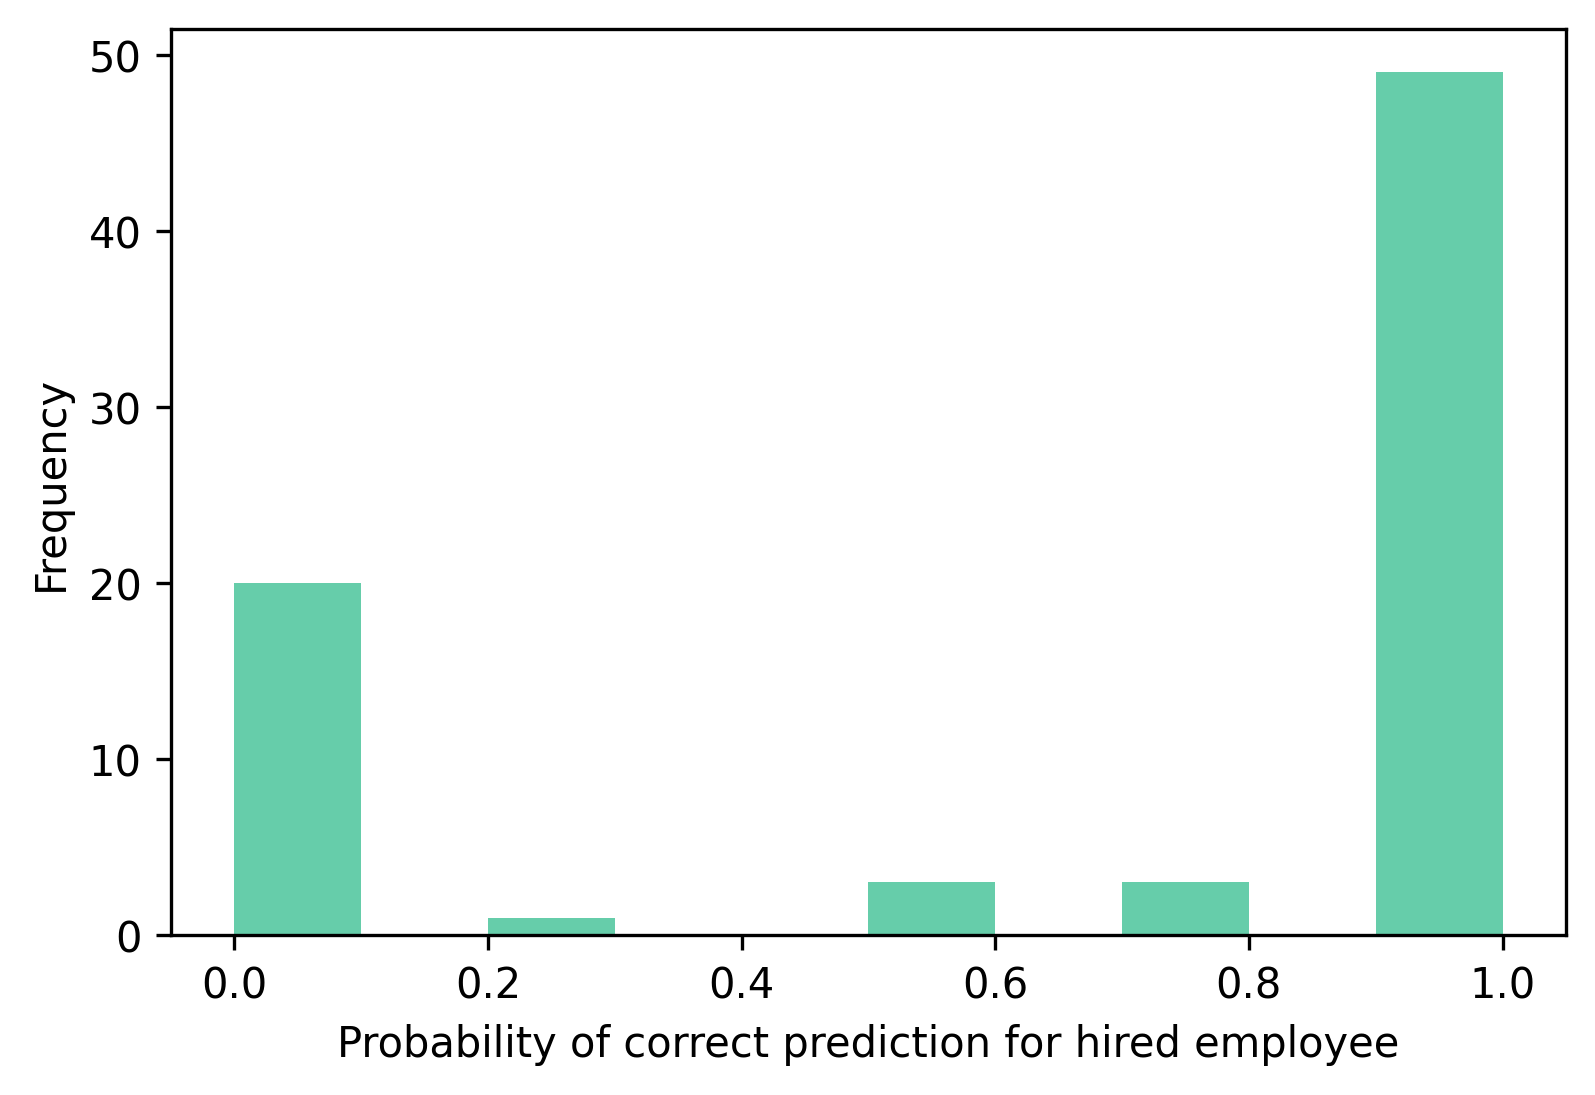

In [0]:
Y_test.index=predict_outcome.index
hired_accuracy=pd.DataFrame(columns=Y_test[Y_test==1].index,index=['mean_prediction'])
for i in Y_test[Y_test==1].index.to_list():
    hired_accuracy.loc['mean_prediction',i]=np.mean(predict_outcome.loc[i,:])
plt.hist(hired_accuracy.loc['mean_prediction',:].values,color='#66CDAA')
plt.xlabel('Probability of correct prediction for hired employee')
plt.ylabel('Frequency')

10% percent of hired population were wrongly predicted by all models. 82.8% of hired population were correctly predicted all the time.

#Introduce arbitrariness by withdrawing features

## predict

In [0]:
def predict_prob(clean_df):    
    encode_df = clean_df.copy()
    features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
    for feature in features_to_encode:
        encode_df = encode_and_bind(encode_df, feature)

    data = encode_df.values
    data = np.nan_to_num(data.astype(float))

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=0)
    for train_index, test_index in sss.split(data, labels):
        X_train, Y_train = data[train_index], labels[train_index]
        X_test, Y_test = data[test_index], labels[test_index]
    Y_train=pd.DataFrame(Y_train)
    X_train=pd.DataFrame(X_train)
    Y_train.index=X_train.index

    
    # sample 90% of training data 
    n_employee=int(X_train.shape[0]*0.9)
    employee_list=list(X_train.index)
    sampled_emp=random.sample(employee_list,n_employee)
    X_train, Y_train = X_train.loc[sampled_emp,:], Y_train.loc[sampled_emp,:]

    model = XGBClassifier().fit(X_train, Y_train)
    y_predict_probas = model.predict_proba(X_test)[:, 1] # only get the probablility of label 1
    return(y_predict_probas)

In [0]:
predict_prob_outcome=pd.DataFrame(columns=np.arange(55),index=np.array(range(len(Y_test))))
for i in range(55):
    y_predict_probas=predict_prob(clean_df)
    predict_prob_outcome.loc[:,i]=y_predict_probas
# predict_prob_outcome

In [0]:
# predict_prob_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/predict_prob_outcome.csv',index_label=False)

In [0]:
# get the var of 55 prediction prob, then get the average of var of all label 1 samples.
estimated_var = np.mean(np.var(predict_prob_outcome, axis=1))
estimate_std = estimated_var**0.5

In [0]:
def predict(clean_df,estimate_std):
    
    encode_df = clean_df.copy()

    features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
    for feature in features_to_encode:
        encode_df = encode_and_bind(encode_df, feature)

    data = encode_df.values
    data = np.nan_to_num(data.astype(float))
    for train_index, test_index in sss.split(data, labels):
        X_train, Y_train = data[train_index], labels[train_index]
        X_test, Y_test = data[test_index], labels[test_index]

    model = XGBClassifier().fit(X_train, Y_train)
    
    # add a random generated number centered at 1 with std from previous analysis
    y_pred = (model.predict_proba(X_test)[:, 1] + np.random.normal(0, estimate_std, size=(len(X_test),)) > 0.5).astype(int)

    f1 = f1_score(Y_test,y_pred, pos_label = 1)
    acc = accuracy_score(Y_test,y_pred)
    auc_roc = roc_auc_score(Y_test,y_pred)
#     print(f'Accuracy = {acc%100:.2f}%. F1-score = {f1:.4f}. AUC_ROC = {auc_roc:.4f}')
    return(f1,acc,auc_roc,y_pred)

In [0]:
predict(clean_df,estimate_std)

Accuracy = 0.85%. F1-score = 0.7483. AUC_ROC = 0.8159


## Prediction outcome for 55 runs

In [0]:
r_predict_outcome=pd.DataFrame(columns=np.arange(55),index=np.array(range(len(Y_test))))
r_evaluation_outcome=pd.DataFrame(columns=np.arange(55),index=['Accuracy','F1','AUC_ROC'])

In [0]:
for i in range(55):
    f1,acc,auc_roc,y_pred=predict(clean_df,estimate_std)
    r_predict_outcome.loc[:,i]=y_pred
    r_evaluation_outcome.loc['Accuracy',i]=acc
    r_evaluation_outcome.loc['F1',i]=f1
    r_evaluation_outcome.loc['AUC_ROC',i]=auc_roc

In [0]:
r_predict_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/randomness_predict_outcome.csv',index_label=False)
r_evaluation_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/randomness_evaluation_outcome.csv',index_label=False)


## Evaluation metric

In [0]:
r_predict_outcome=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/randomness_predict_outcome.csv')
r_evaluation_outcome=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/randomness_evaluation_outcome.csv')

In [0]:
# systematic error across all models
r_all_wrong=list()
r_all_false_pos=list()
r_all_false_neg=list()
r_all_right=list()
for i_result, result in enumerate(Y_test):
    if (result-np.mean(r_predict_outcome.loc[i_result,:]))==-1:
        r_all_false_pos.append(i_result)
    if (result-np.mean(r_predict_outcome.loc[i_result,:]))==1:
        r_all_false_neg.append(i_result)
    if abs(result-np.mean(r_predict_outcome.loc[i_result,:]))==1:
        r_all_wrong.append(i_result)
    elif abs(result-np.mean(r_predict_outcome.loc[i_result,:]))==0:
        r_all_right.append(i_result)
        
# number of prediction who were consistently wrong for all models
print((len(r_all_wrong)/len(Y_test)))

# number of prediction who were consistently right for all models
print((len(r_all_right)/len(Y_test)))

0.072
0.756


In [0]:
r_evaluation_outcome['mean']=r_evaluation_outcome.mean(axis=1)
r_evaluation_outcome['std']=r_evaluation_outcome.std(axis=1)
r_evaluation_outcome

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,mean,std
Accuracy,0.856,0.852,0.868,0.864,0.86,0.86,0.856,0.852,0.86,0.88,...,0.848,0.864,0.876,0.856,0.844,0.872,0.86,0.856,0.859782,0.010442
F1,0.73913,0.733813,0.765957,0.757143,0.755245,0.751773,0.73913,0.741259,0.748201,0.785714,...,0.728571,0.753623,0.783217,0.746479,0.727273,0.774648,0.755245,0.753425,0.753080,0.018580
AUC_ROC,0.803917,0.801044,0.823654,0.817075,0.817907,0.814201,0.803917,0.808454,0.810496,0.83598,...,0.79817,0.81337,0.836812,0.811328,0.799002,0.830233,0.817907,0.818739,0.815796,0.012891


In [0]:
r_evaluation_outcome
print(min(r_evaluation_outcome.loc['Accuracy',:]))
print(np.mean(r_evaluation_outcome.loc['Accuracy',:]))
print(np.mean(r_evaluation_outcome.loc['F1',:]))
print(np.mean(r_evaluation_outcome.loc['AUC_ROC',:]))

0.010442380273918594
0.844881126288697
0.7401945177100164
0.8017102864148615


Out[257]: Text(0, 0.5, 'Frequency')

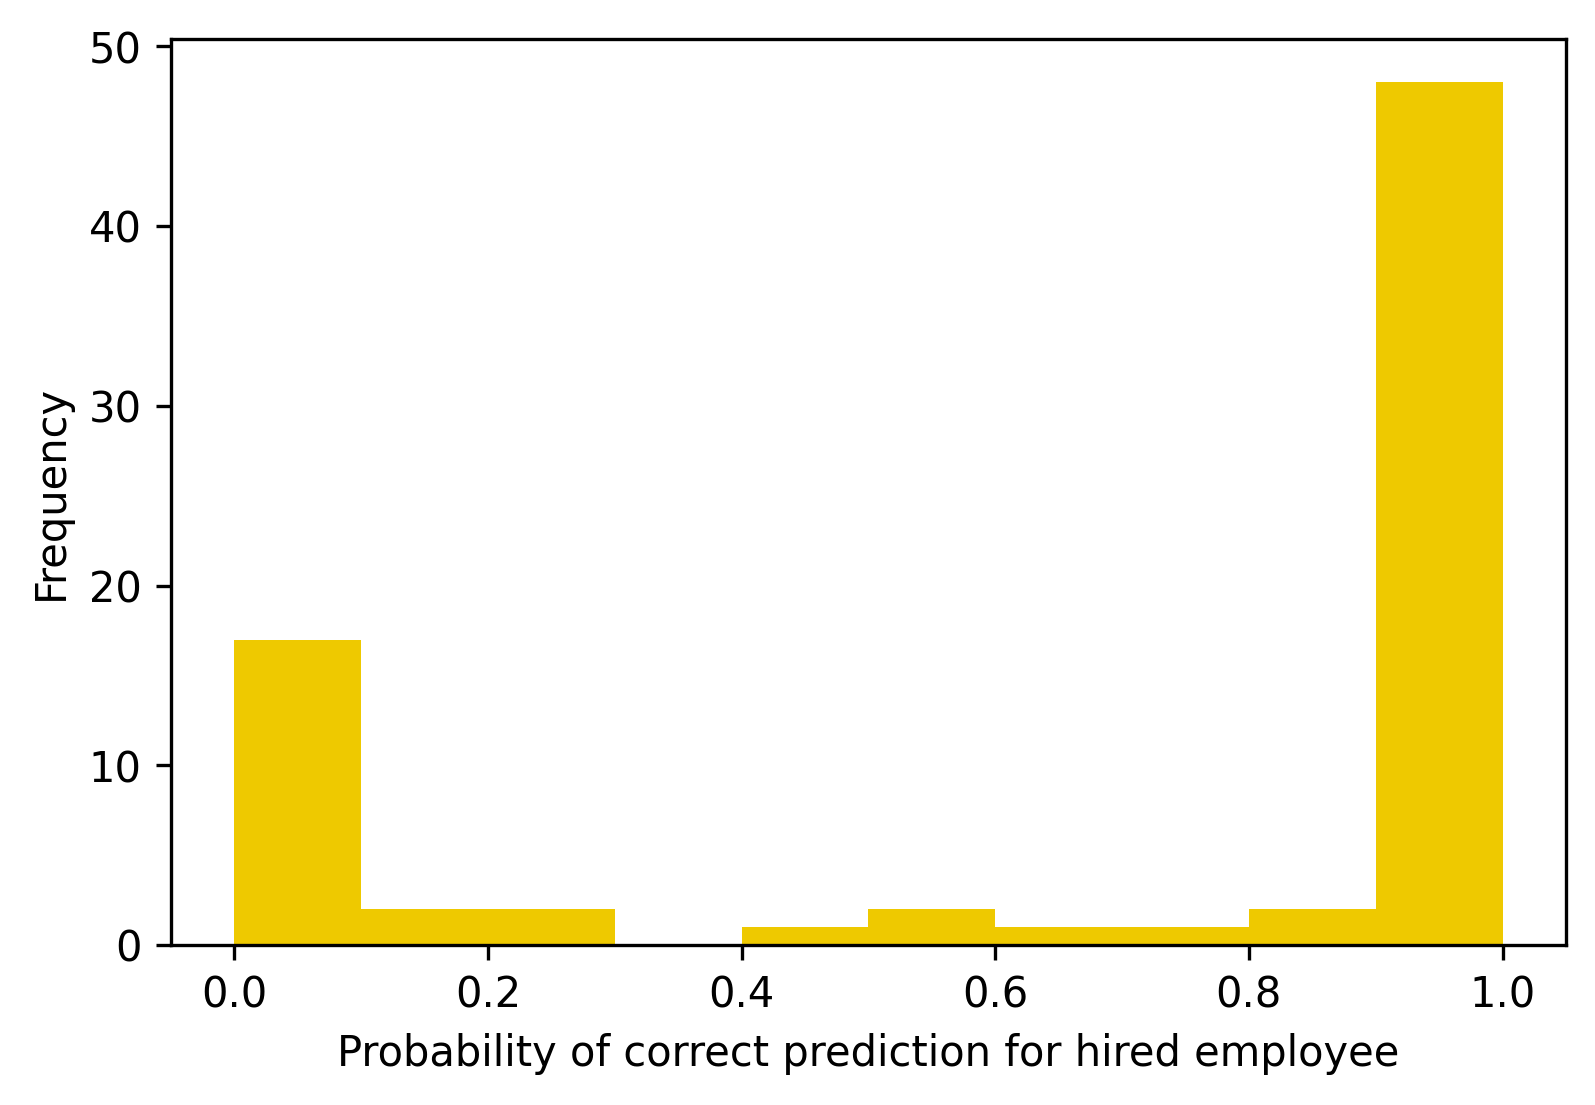

In [0]:
Y_test.index=r_predict_outcome.index
hired_accuracy=pd.DataFrame(columns=Y_test[Y_test==1].index,index=['mean_prediction'])
for i in Y_test[Y_test==1].index.to_list():
    hired_accuracy.loc['mean_prediction',i]=np.mean(r_predict_outcome.loc[i,:])
plt.hist(hired_accuracy.loc['mean_prediction',:].values,color='#EEC900')
plt.xlabel('Probability of correct prediction for hired employee')
plt.ylabel('Frequency')

7.2% percent of hired population were wrongly predicted by all models. 75.6% of hired population were correctly predicted all the time.

# conclusion

In [0]:
evaluation_df=pd.concat([employee_evaluation_outcome['mean'],feature_evaluation_outcome['mean'],classifier_evaluation_outcome['mean'],r_evaluation_outcome['mean']],axis=1)
evaluation_df.columns=['Population_sampling','Featrue_sampling','Algorithm_sampling','Randomne_to_prediction']
evaluation_df

,Population_sampling,Featrue_sampling,Algorithm_sampling,Randomne_to_prediction
Accuracy,0.863636,0.857309,0.866000,0.859782
F1,0.754953,0.740376,0.759802,0.753080
AUC_ROC,0.815130,0.808024,0.818512,0.815796


In [0]:
systematic_error_all=[(len(e_all_wrong)/len(Y_test)),(len(f_all_wrong)/len(Y_test)),(len(c_all_wrong)/len(Y_test)),(len(r_all_wrong)/len(Y_test))]
systematic_error_false_pos=[(len(e_all_false_pos)/len(Y_test)),(len(f_all_false_pos)/len(Y_test)),(len(c_all_false_pos)/len(Y_test)),(len(r_all_false_pos)/len(Y_test))]
systematic_error_false_neg=[(len(e_all_false_neg)/len(Y_test)),(len(f_all_false_neg)/len(Y_test)),(len(c_all_false_neg)/len(Y_test)),(len(r_all_false_neg)/len(Y_test))]
systematic_correct_all=[(len(e_all_right)/len(Y_test)),(len(f_all_right)/len(Y_test)),(len(c_all_right)/len(Y_test)),(len(r_all_right)/len(Y_test))]

systematic_error=pd.DataFrame([systematic_error_all,systematic_error_false_pos,systematic_error_false_neg])
systematic_error.columns=['Population_sampling','Featrue_sampling','Algorithm_sampling','Randomne_to_prediction']
systematic_error.index=['systematic error','systematic false positive','systematic false negative']
systematic_error

systematic=pd.DataFrame([systematic_error_all,systematic_error_false_pos,systematic_error_false_neg,systematic_correct_all])
systematic.columns=['Population_sampling','Featrue_sampling','Algorithm_sampling','Randomne_to_prediction']
systematic.index=['systematic error','systematic false positive','systematic false negative','systematic correct']
systematic

,Population_sampling,Featrue_sampling,Algorithm_sampling,Randomne_to_prediction
systematic error,0.036,0.048,0.100,0.072
systematic false positive,0.008,0.000,0.020,0.016
systematic false negative,0.028,0.048,0.080,0.056
systematic correct,0.684,0.508,0.828,0.756


In [0]:
systematic_error

,Population_sampling,Featrue_sampling,algorithm_sampling
systematic error,0.036,0.048,0.10
systematic false positive,0.008,0.000,0.02
systematic false negative,0.028,0.048,0.08


##conclusion
The four different method gives similar accuracy performance.

To minimize false negative, i.e all hired employee were predicted as hired in some model, population sampling has the best performance.

Population sampling also achieve lowest overall systematic error.